In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data/countries.csv')
data.head(2)

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


# Find relationship between GDP per capita and Life Expectancy

In [4]:
data_2007 = data[data.year==2007]

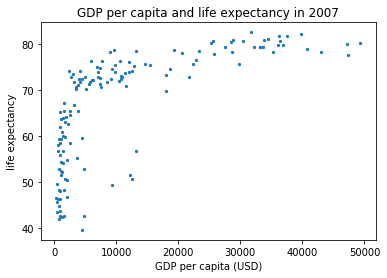

In [7]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title('GDP per capita and life expectancy in 2007')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('life expectancy')
plt.show()
# non-linear correlation; plateaus after specific GDP per capita
# check it out in log scale

In [8]:
# finding a correlation?
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancyExpectancy)

0.6786623986777587

In [10]:
# non-linear correlation; plateaus after specific GDP per capita
# check it out in log scale
np.log10([10,100,1000]) # = [10^1, 10^2, 10^3]

array([1., 2., 3.])

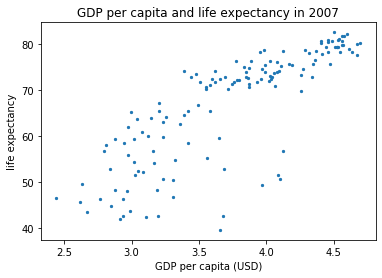

In [15]:
# cast gdpPerCapita to log10 scale

plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)
plt.title('GDP per capita and life expectancy in 2007')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('life expectancy')
plt.show()

In [16]:
np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)

0.8089802514849209

In [18]:
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777587

### Plot relationship per year

In [22]:
years_sorted = sorted(set(data.year))

In [26]:
for given_year in years_sorted:
    data_year = data[data.year==given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(0,60000)
    plt.ylim(25,85)
    plt.xlabel('GDP Per Capita')
    plt.ylabel('life expectancy')
#    plt.show()
    plt.savefig(str(given_year), dpi=200)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [27]:
data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [28]:
for given_year in years_sorted:
    data_year = data[data.year==given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25,85)
    plt.xlabel('GDP Per Capita (log scale)')
    plt.ylabel('life expectancy')
#    plt.show()
    plt.savefig('log_'+str(given_year), dpi=200)
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Examine relationship between GDP (NOT per capita!) and Life Expectancy in 2007

GDP = population * gdpPerCapita

In [29]:
data.head(2)

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


In [30]:
data['GDP'] = data.population*data.gdpPerCapita
data.head(2)

,country,continent,year,lifeExpectancy,population,gdpPerCapita,GDP
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,7.585449e+09


In [32]:
data_2007 = data[data.year==2007]
data_2007.head(2)

,country,continent,year,lifeExpectancy,population,gdpPerCapita,GDP
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,3.107929e+10
23,Albania,Europe,2007,76.423,3600523,5937.029526,2.137641e+10


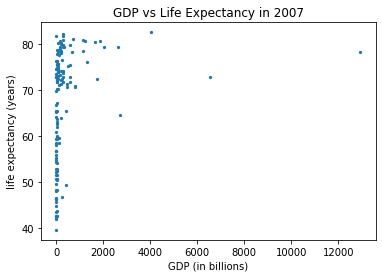

In [41]:
plt.scatter(data_2007.GDP/10**9, data_2007.lifeExpectancy, 5)
plt.title('GDP vs Life Expectancy in 2007')
plt.xlabel('GDP (in billions)')
plt.ylabel('life expectancy (years)')

plt.show()

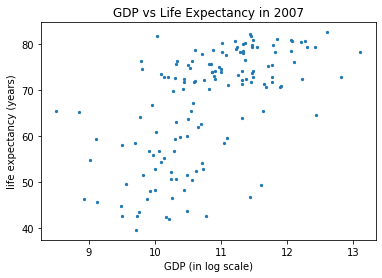

In [42]:
plt.scatter(np.log10(data_2007.GDP), data_2007.lifeExpectancy, 5)
plt.title('GDP vs Life Expectancy in 2007')
plt.xlabel('GDP (in log scale)')
plt.ylabel('life expectancy (years)')

plt.show()

relationship plot with all the columns? 
T his is called a pairplot. Doesn't seem to be available in matplotlib, but is in seaborn!


how to add trendline?
use numpy to calculate linear fitting